In [1]:
%cd /home/ltchen/gnnpp
%ls utils

/home/ltchen/gnnpp
data.py  drn_utils.py  __init__.py  plot.py  __pycache__/


In [6]:
import utils.data  # Import the module first
print(dir(utils.data))
from utils.data import load_complete_dataframe

['Data', 'DefaultDict', 'List', 'StandardScaler', 'Tuple', 'Union', 'ZarrLoader', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'compute_dist_matrix', 'create_multigraph', 'defaultdict', 'dist_km', 'generate_layers', 'geopy', 'get_mask', 'load_dataframes', 'load_distances', 'load_stations', 'normalize_features_and_create_graphs', 'np', 'os', 'pd', 'rm_edges', 'shuffle_features', 'split_graph', 'summary_statistics', 'torch', 'torch_geometric', 'xr']


ImportError: cannot import name 'load_complete_dataframe' from 'utils.data' (/tmp/pycharm_project_304/utils/data.py)

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
from utils.data import load_dataframes, load_distances, normalize_features_and_create_graphs, summary_statistics #, load_complete_dataframe

import seaborn as sns

In [3]:
import xarray as xr
ZARRDATAFOLDER = '/mnt/sda/Data2/gnnpp-data/EUPPBench-stations/'
xr_train = xr.open_zarr(f'{ZARRDATAFOLDER}train.zarr')

Dataframes for 'train': train_rf (1997-2013), test_rf (2014-2017), test_f (2017-2018)

In [5]:
dataframes_trn = load_dataframes(mode="train", leadtime="24h")
(t_train_rf, t_train_rf_target) = dataframes_trn["train"]
(t_test_rf, t_test_rf_target) = dataframes_trn["test_rf"]
(t_test_f, t_test_f_target) = dataframes_trn["test_f"]
t_stations_f = dataframes_trn["stations"]
print(t_stations_f.columns) # cache nochmal leeren fuer aktuellstes station_df

[INFO] Dataframes exist. Will load pandas dataframes.
Index(['station_id', 'lat', 'lon', 'altitude', 'name'], dtype='object')


In [9]:
t_test_rf_target.isna().sum()

time              0
station_id        0
t2m           12401
dtype: int64

In [10]:
sum_dfs_train = summary_statistics(dataframes_trn)
print(type(sum_dfs_train))
print(sum_dfs_train[0])
# check shape of each item in dfs?

[INFO] Calculating summary statistics for train
[INFO] Calculating summary statistics for test_rf
[INFO] Calculating summary statistics for test_f
<class 'collections.defaultdict'>
None


In [11]:
print(f"Shape of train_rf: {t_train_rf.shape}")
print(f"Shape of test_rf: {t_test_rf.shape}")
print(f"Shape of test_f: {t_test_f.shape}")
print("")
print(f"# Ensemble members in train_rf: {t_train_rf.number.nunique()}")
print(f"# Ensemble members in test_rf: {t_test_rf.number.nunique()}")
print(f"# Ensemble members in test_f: {t_test_f.number.nunique()}")
print("")
print(f"Unique times in train_rf: {t_train_rf.time.nunique()}")
print(f"Unique times in test_rf: {t_test_rf.time.nunique()}")
print(f"Unique times in test_f: {t_test_f.time.nunique()}")

Shape of train_rf: (4627216, 36)
Shape of test_rf: (982344, 36)
Shape of test_f: (4542060, 36)

# Ensemble members in train_rf: 11
# Ensemble members in test_rf: 11
# Ensemble members in test_f: 51

Unique times in train_rf: 3448
Unique times in test_rf: 732
Unique times in test_f: 730


In [52]:
t_train_rf.groupby('station_id').first()

,number,time,cape,model_orography,sd,station_altitude,station_latitude,station_longitude,stl1,swvl1,...,ssr6,ssrd6,str6,strd6,tp6,z,q,u,v,t
station_id,,,,,,,,,,,,,,,,,,,,,
0,0,1997-01-02,0.515625,-1.706008,0.000000,1.2,52.928000,4.781000,281.966064,-4.102818e-22,...,0.0,0.0,-1183741.0,6533068.0,0.000038,53168.78125,0.001777,-8.083289,15.863815,271.745361
1,0,1997-01-02,3.046875,-1.298122,0.000000,-3.3,52.318000,4.790000,279.299561,5.120544e-01,...,0.0,0.0,-933629.0,6394828.0,0.000541,53179.28125,0.003039,1.166711,10.319870,271.828369
2,0,1997-01-02,0.000000,0.333424,0.000000,10.8,53.241000,4.921000,281.732178,-4.102818e-22,...,0.0,0.0,-826109.0,6875596.0,0.000040,53198.28125,0.001025,-7.635047,14.503464,272.024658
3,0,1997-01-02,0.015625,1.302155,0.000000,0.7,53.392000,5.346000,281.952881,-4.102818e-22,...,0.0,0.0,-833533.0,6891980.0,0.000154,53237.65625,0.000767,-7.935828,12.798386,272.303955
4,0,1997-01-02,3.703125,2.576800,0.000000,1.9,52.100000,5.180000,278.962158,3.447723e-01,...,0.0,0.0,-1030141.0,6236876.0,0.000784,53226.65625,0.002784,0.735070,11.590378,271.850342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0,1997-01-02,0.140625,521.714299,0.000000,331.0,45.786833,3.149333,278.517334,3.864136e-01,...,0.0,0.0,-653309.0,6549708.0,0.000114,54077.40625,0.000396,12.248742,-6.586380,271.162354
118,0,1997-01-02,4.937500,689.253673,0.001457,424.0,47.499168,9.746111,273.719482,3.999939e-01,...,0.0,0.0,-264189.0,6639820.0,0.001925,53689.40625,0.001769,9.557336,-2.701614,271.952393
119,0,1997-01-02,7.875000,972.938723,0.004192,439.0,47.266666,9.600000,273.036377,3.880310e-01,...,0.0,0.0,-295421.0,6395596.0,0.002204,53684.40625,0.001779,8.998742,-3.452591,272.081299


In [ ]:
from utils.drn_utils import normalize_features

train, valid_test = normalize_features(
    training_data=dataframes_trn["train"], valid_test_data=[dataframes_trn["test_rf"], dataframes_trn["test_f"]]
)




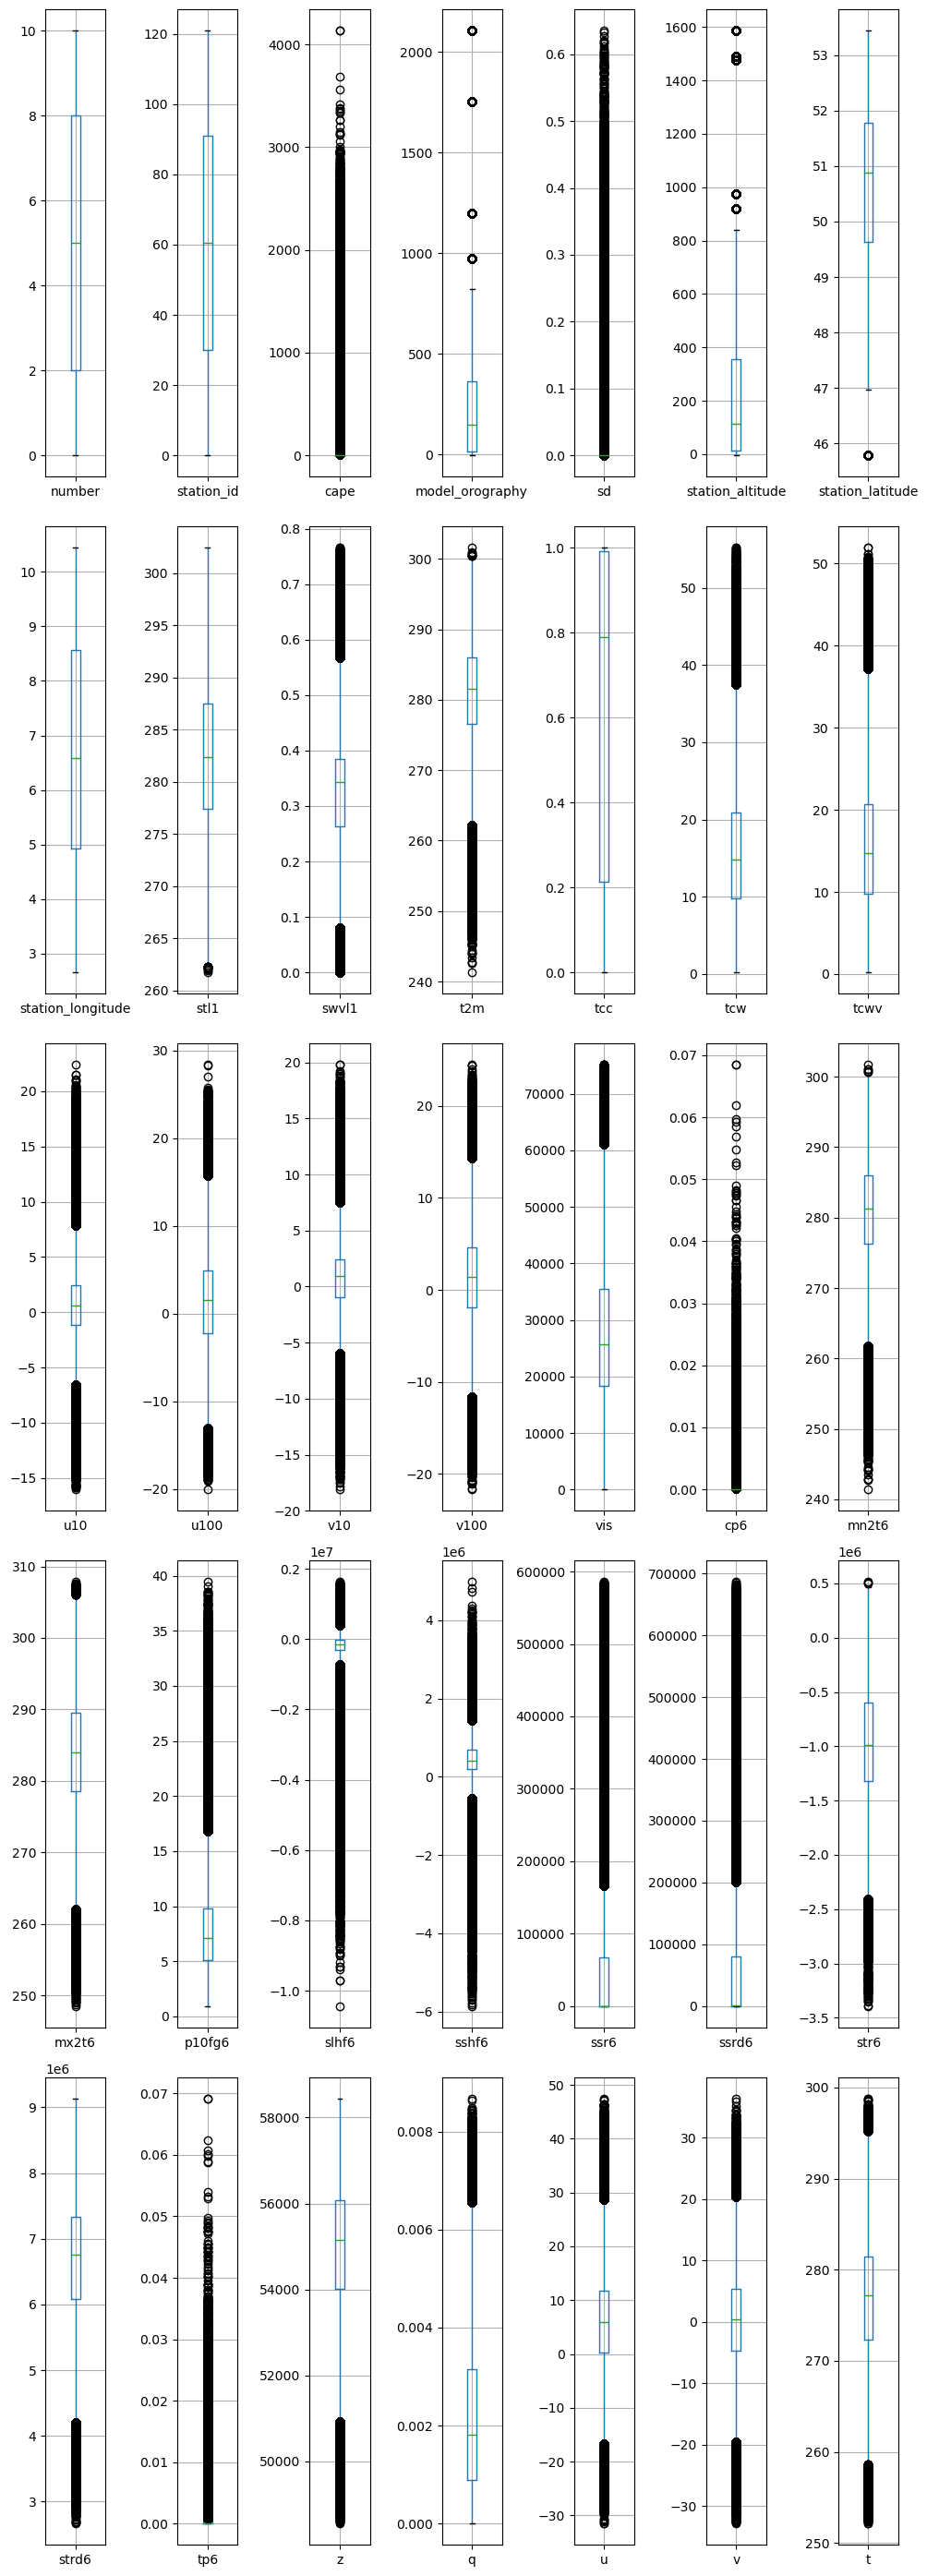

In [69]:
# plot
fig, axes = plt.subplots(5, 7, figsize=(10, 28))
axes = axes.flatten()
for i, col in enumerate(t_train_rf.select_dtypes(include=['number']).columns):
    # t_train_rf.boxplot(col, ax=axes[i])
    t_train_rf[[col]].boxplot(ax=axes[i])
plt.tight_layout()
plt.show()



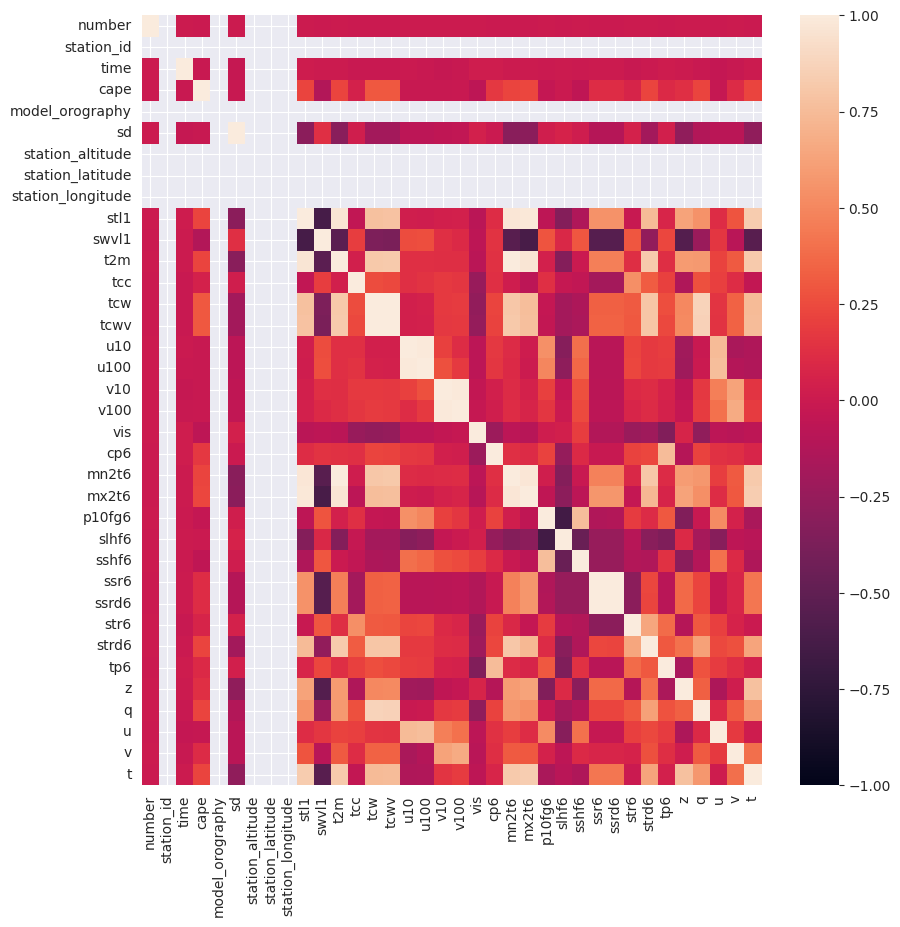

In [35]:
t_df = t_train_rf[~t_train_rf.isna()]
t_df = t_df[t_df["station_id"]==1]
corr_mat = t_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=False, vmin=-1, vmax=1)

plt.show()



In [34]:
print(t_df.columns)
print(t_df.model_orography)

Index(['number', 'station_id', 'time', 'cape', 'model_orography', 'sd',
       'station_altitude', 'station_latitude', 'station_longitude', 'stl1',
       'swvl1', 't2m', 'tcc', 'tcw', 'tcwv', 'u10', 'u100', 'v10', 'v100',
       'vis', 'cp6', 'mn2t6', 'mx2t6', 'p10fg6', 'slhf6', 'sshf6', 'ssr6',
       'ssrd6', 'str6', 'strd6', 'tp6', 'z', 'q', 'u', 'v', 't'],
      dtype='object')
1         -1.298122
123       -1.298122
245       -1.298122
367       -1.298122
489       -1.298122
             ...   
4626607   -1.298122
4626729   -1.298122
4626851   -1.298122
4626973   -1.298122
4627095   -1.298122
Name: model_orography, Length: 37928, dtype: float64


Index(['station_id', 'lat', 'lon', 'altitude', 'name'], dtype='object')


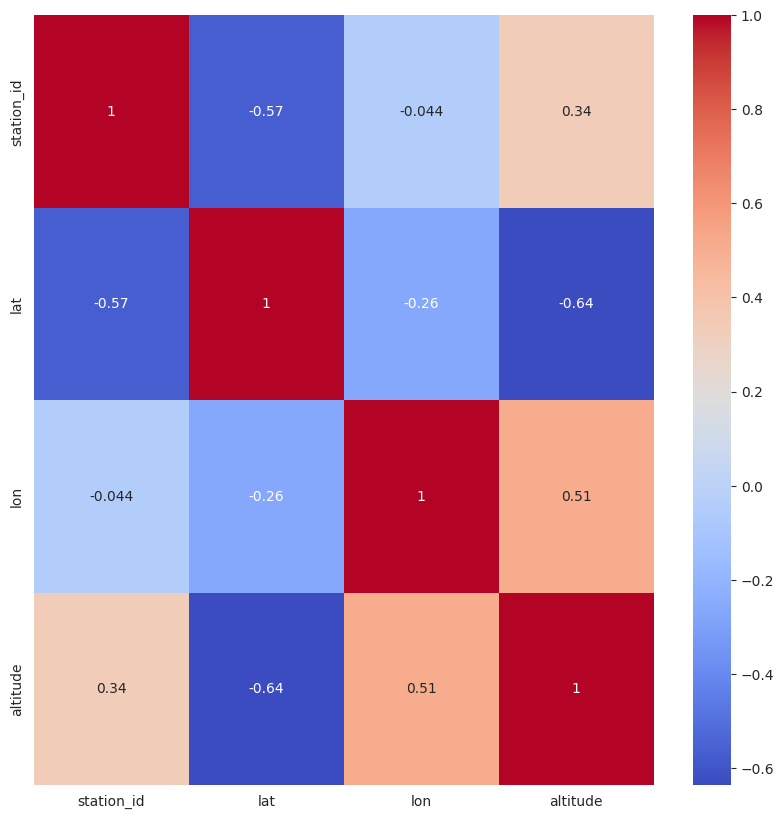

In [26]:
print(t_stations_f.columns)
stat_corr = t_stations_f.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(stat_corr, annot=True, cmap="coolwarm")

plt.show()

In [39]:
import pandas as pd
f = t_train_rf[t_train_rf["station_id"]==1]
#=> checke ob orog gleich für alle Stationen!

# wann ist model_orog die gleiche Zahl wie altitude? gibt es Faelle?
#

#print(bool.any())
print(t_train_rf["model_orography"].nunique())
print(t_train_rf["model_orography"].value_counts().value_counts()) # also gibt es 6 Stationen, die doppelt vorkommen? (gleiche Orog)

print(t_stations_f["altitude"].value_counts().value_counts()) # es gibt 4 Stationen, die die gleiche Altitude haben

orog_alt_df = pd.concat([t_train_rf["model_orography"], t_train_rf["station_altitude"]], axis=1).corr()
orog_alt_df


116
count
37928    110
75856      6
Name: count, dtype: int64
count
1    114
2      4
Name: count, dtype: int64


,model_orography,station_altitude
model_orography,1.000000,0.888802
station_altitude,0.888802,1.000000


In [ ]:
# other ideas:
# plot on geographical map
# altitude in m? how often are rf and f generated? How are they generated?
# given one station - is there a correlation between the features?

Dataframes for 'hyperopt': train_rf (1997-2009), valid_rf (2010-2013)

In [7]:
dataframes_hpo = load_dataframes(mode="hyperopt", leadtime="24h")
(h_train_rf, h_train_rf_target) = dataframes_hpo["train"]
(h_valid_rf, h_valid_rf_target) = dataframes_hpo["valid"]
h_stations_f = dataframes_hpo["stations"]
print(h_stations_f)

[INFO] Dataframes exist. Will load pandas dataframes.
     station_id        lat        lon  altitude                  name
0           235  52.928000   4.781000       1.2               De Kooy
1           240  52.318000   4.790000      -3.3              Schiphol
2           242  53.241000   4.921000      10.8              Vlieland
3           251  53.392000   5.346000       0.7  Hoorn (Terschelling)
4           260  52.100000   5.180000       1.9               De Bilt
..          ...        ...        ...       ...                   ...
117        7460  45.786833   3.149333     331.0           Clermont-Fd
118       11101  47.499168   9.746111     424.0               Bregenz
119       11105  47.266666   9.600000     439.0             Feldkirch
120       11308  47.255833  10.186111    1478.0                 Warth
121       11312  46.968056  10.185555    1587.0               Galtuer

[122 rows x 5 columns]


In [37]:
print(type(h_train_rf))
print(h_train_rf.isna().any())
print(h_train_rf.shape)

<class 'pandas.core.frame.DataFrame'>
number               False
station_id           False
time                 False
cape                 False
model_orography      False
sd                   False
station_altitude     False
station_latitude     False
station_longitude    False
stl1                 False
swvl1                False
t2m                  False
tcc                  False
tcw                  False
tcwv                 False
u10                  False
u100                 False
v10                  False
v100                 False
vis                  False
cp6                  False
mn2t6                False
mx2t6                False
p10fg6               False
slhf6                False
sshf6                False
ssr6                 False
ssrd6                False
str6                 False
strd6                False
tp6                  False
z                    False
q                    False
u                    False
v                    False
t                

In [38]:
print(h_train_rf.time.nunique())

2612
